In [1]:
import h5py
import stability_functions as sf
import numpy as np
import sys
import rebound
import corner
import pandas as pd
import dask.dataframe as dd
from multiprocessing import Pool
# plotting
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
# %matplotlib inline
import os
import glob

import matplotlib.colors as mcol
cmaprb = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])

def create_color_plots(df):
    
    transparency = 0.05
    s=200
    txtsize = 32
    low_thres=0.3
    hi_thres=0.7
    
    fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=[24, 12])

    proba = df['probstability'].values
    axarr[0].scatter(df["k"], df["h"], c=proba, cmap=cmaprb, s=s, lw=0, alpha=transparency)
    axarr[1].scatter(df["Z12"], df["Z23"], c=proba, cmap=cmaprb, s=s, lw=0, alpha=transparency)

    axarr[0].set_xlabel(r'$e_{2x}$', labelpad=20)
    axarr[0].set_ylabel(r'$e_{2y}$')
    axarr[1].set_xlabel(r'$e_-^{12}$')
    axarr[1].set_ylabel(r'$e_-^{23}$')
    
    for ax in axarr.flatten():
        plt.setp(ax.xaxis.label, fontsize=30)
        plt.setp(ax.yaxis.label, fontsize=30)
        plt.setp(ax.get_xticklabels(), fontsize=24)
        plt.setp(ax.get_yticklabels(), fontsize=24)

/storage/home/cjg66/miniconda3/lib/python3.7/site-packages/radvel/gp.py:33: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  Try installing celerite using 'pip install celerite'", ImportWarning)


In [2]:
systems = ["HR858", "K431", "TOI270", "L98-59", "K23"]
system = systems[4]
sim_names_base = system + "/" + system

In [3]:
n_workers = os.cpu_count()

def collision(reb_sim, col):
    reb_sim.contents._status = 5
    return 0

def pred(nsim):
    return sf.pred(sim_names + "_start", nsim)

def get_k(row):
    return sf.get_k(sim_names + "_start", row)

pool = Pool(processes=n_workers, initializer=sf.init_process)

Process ForkPoolWorker-6:
Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/storage/home/cjg66/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/storage/home/cjg66/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/storage/home/cjg66/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/storage/home/cjg66/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  Fil

In [4]:
ns = [30000, 2000000]
name_adds = ["loge", "logm"]
hadden_names = ["HighMassPriors", "DefaultPriors"]

selection = 1
n = ns[selection]
name_add = name_adds[selection]
hadden_name = hadden_names[selection]

sim_names = sim_names_base + "_" + name_add

# Hadden Posteriors

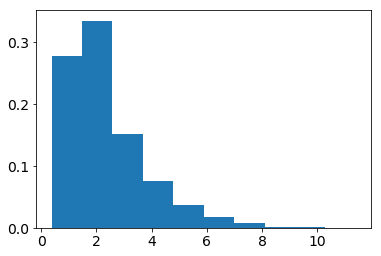

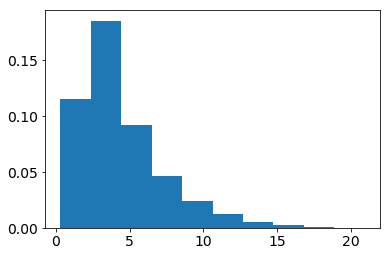

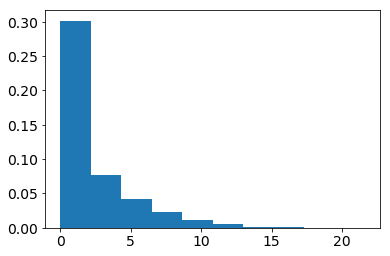

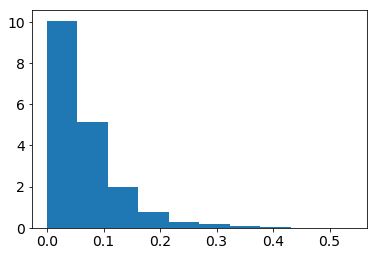

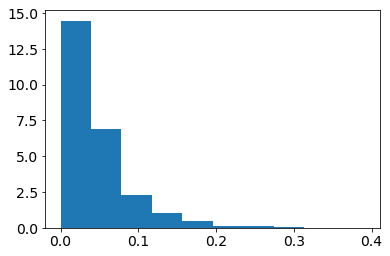

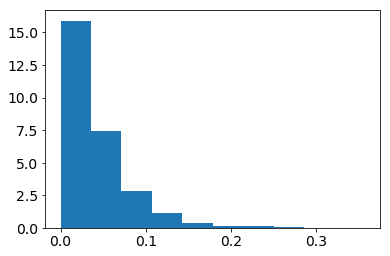

In [5]:
f = h5py.File('NBody_MCMC_Posteriors.hdf5', 'r')
post = f["Kepler-23"][hadden_name]["PosteriorSample"]
#mu_1, P_1, h_1, k_1, T_1,...,mu_N, P_N, h_N, k_N, T_N


plt.hist(post[:,0] * 1.100 * 333000, density=True)
plt.show()
plt.hist(post[:,5] * 1.100 * 333000, density=True)
plt.show()
plt.hist(post[:,10] * 1.100 * 333000, density=True)
plt.show()

plt.hist(np.sqrt(post[:,2]**2 + post[:,3]**2), density=True)
plt.show()
plt.hist(np.sqrt(post[:,7]**2 + post[:,8]**2), density=True)
plt.show()
plt.hist(np.sqrt(post[:,12]**2 + post[:,13]**2), density=True)
plt.show()

# Generating systems

In [50]:
# logm = name_add=="logm"
# loge = not logm
# print(loge, logm)
# for i in range(n):
#     name = sim_names + "_start_%d.bin"%i
#     sf.replace_snapshot(sf.build_Hadden_system(system, logm=logm, loge=loge), name)

False True


# Finding systems to test with Nbody

In [12]:
# logm = name_add=="logm"
# loge = !logm

# def to_test(nsim):

#     sim = sf.build_Hadden_system(system, logm=logm, loge=loge)
#     sim_copy = sim.copy()

#     P1 = sim.particles[1].P
#     maxorbs = 100000

#     try:
#         sim.integrate(maxorbs * P1, exact_finish_time=0)
#         name = sim_names_base + "_loge_nb_start_%d.bin"%nsim
#         sf.replace_snapshot(sim_copy, name)
#         with open("jobs/" + system + "_" + name_add + "_nb_%d.pbs"%nsim, "w") as of:
#             of.write("#!/bin/bash\n")
#             of.write("#PBS -N " + name_add + "_stab  # name of job\n")
#             of.write("#PBS -l nodes=1:ppn=1 # how many nodes and processors per node\n")
#             of.write("#PBS -l walltime=10:00:00\n")
#             of.write("#PBS -l pmem=4gb  # how much RAM is needed\n")
#             of.write("#PBS -A cyberlamp  # which allocation to use (either cyberlamp, open, or ebf11_a_g_sc_default)\n")
#             of.write("#PBS -j oe  # put outputs and error info in the same file\n\n")

#             of.write("echo \"Starting job $PBS_JOBNAME\"\n")
#             of.write("date\n")
#             of.write("starttime=$SECONDS\n")
#             of.write("echo \"Job id: $PBS_JOBID\"\n")
#             of.write("echo \"About to change into $PBS_O_WORKDIR\"\n")
#             of.write("cd $PBS_O_WORKDIR\n")
#             of.write("echo \"Running code\"\n")
#             of.write("python test_stability.py 4 %d %d\n"%(nsim,selection))
#             of.write("date\n")
#             of.write("echo \"took $((SECONDS - starttime)) seconds\"\n")
#             of.write("echo \"done :)\"\n")
#     except:
#         pass

In [19]:
# %%time
# nsim_list = np.arange(0, n)
# res = pool.map(to_test, nsim_list)

CPU times: user 581 ms, sys: 186 ms, total: 767 ms
Wall time: 8min 30s


In [135]:
# %%time
# sim = sf.build_Hadden_system(system, logm=True, loge=True)
# sim.integrate(100000 * sim.particles[1].P, exact_finish_time=0)

CPU times: user 2.71 s, sys: 0 ns, total: 2.71 s
Wall time: 3.59 s


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4ce4531090>)

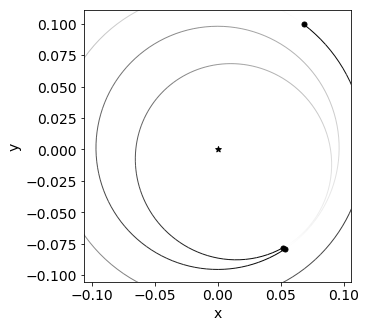

In [25]:
sim = rebound.SimulationArchive(sim_names + "_logm_nb_sa_249057.bin")[-1]
rebound.OrbitPlot(sim)

# SPOCK stability

In [22]:
# %%time
# res = pool.map(pred, nsim_list)

CPU times: user 131 ms, sys: 63 ms, total: 194 ms
Wall time: 1min 27s


In [6]:
df = pd.read_csv(sim_names + "_SPOCK.csv", index_col=0)
nsim_list = df.sim

df1 = sf.add_k_cols(pd.DataFrame(nsim_list, columns=['sim']))
df1['probstability'] = df.probstability

dasklabels = dd.from_pandas(df1, npartitions=n_workers)
df = dasklabels.apply(get_k, axis=1, meta=df1).compute(scheduler='processes')

df["m1"] *= sf.earth_mass_p_solar_mass
df["m2"] *= sf.earth_mass_p_solar_mass
df["m3"] *= sf.earth_mass_p_solar_mass
df["m1+m2"] = df["m1"] + df["m2"]
df["m2+m3"] = df["m2"] + df["m3"]
df["total m"] = df["m1"] + df["m2"] + df["m3"]

df.to_csv(sim_names + "_SPOCK.csv")

# Plotting SPOCK results

In [43]:
df = pd.read_csv(sim_names + "_SPOCK.csv", index_col=0)
# df = df[df["probstability"] != 0]
scores = 2 * df["probstability"]
n = len(scores)
# effective sample size using eq 9.13 https://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf
effective_sample_size = n * np.mean(scores) ** 2 / np.mean(scores ** 2)
print(effective_sample_size)
print(n)
print(effective_sample_size / n)

plot_str = system + "_" + name_add

2814.3971965043793
27053
0.10403272082594829


In [44]:
# plt.hist(df["probstability"])

In [45]:
sum(df["probstability"] > 0.6)

1412

In [107]:
# df2 = pd.read_csv(sim_names + "_nbody.csv", index_col=0)

# plt.hist(df["Z12"][df["probstability"] > 0.6], density=True, alpha=0.5)

# plt.hist(df2["Z12"][df2["probstability"] > 0.1], density=True, alpha=0.5)

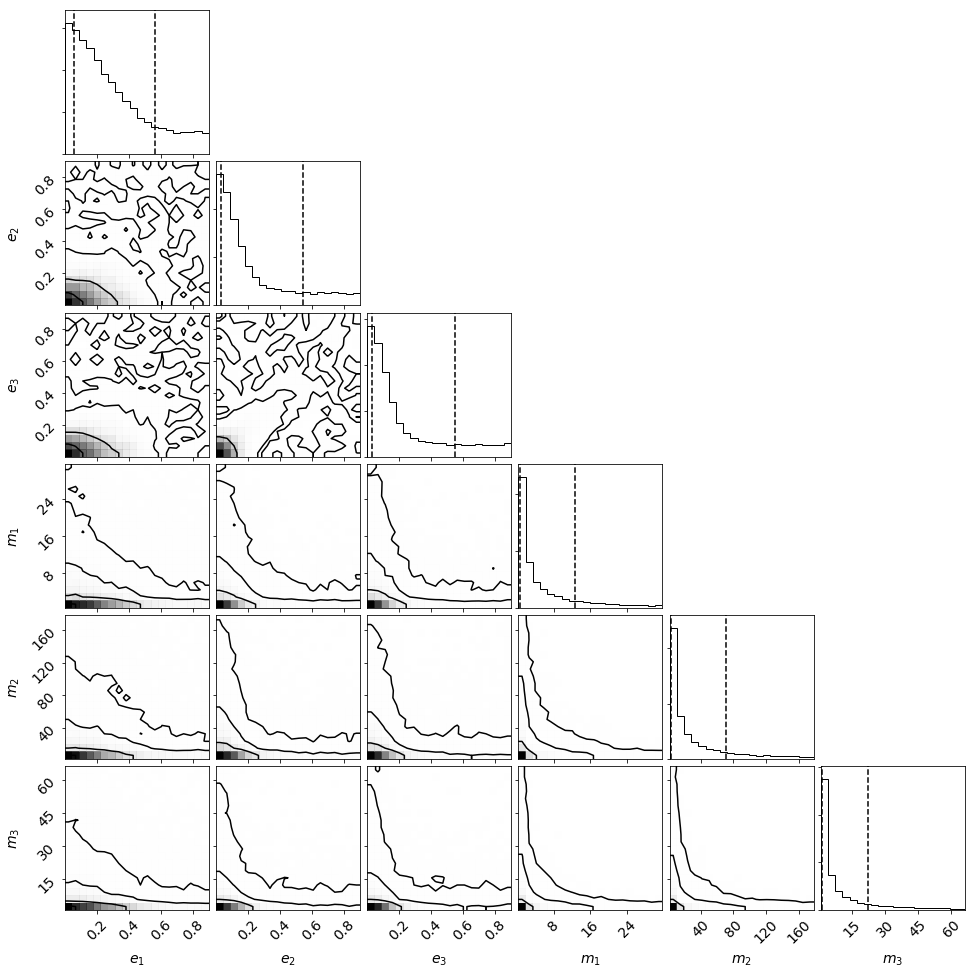

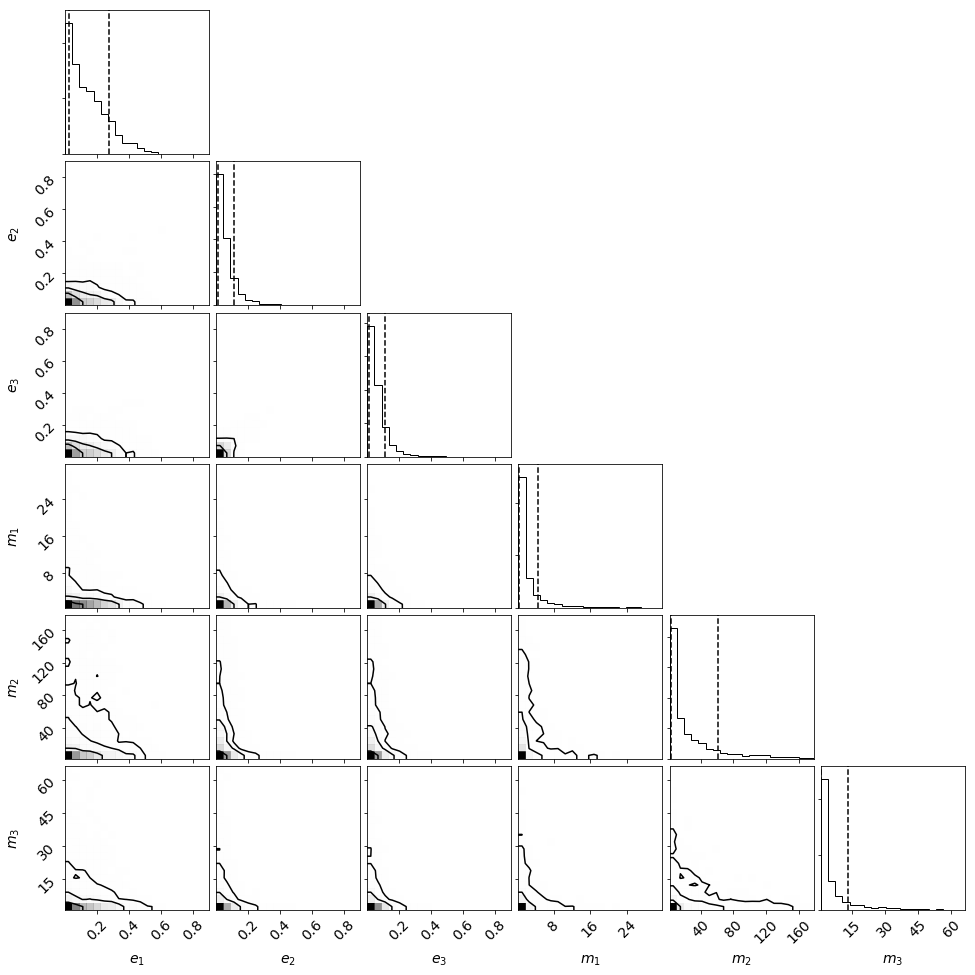

In [46]:
labels = ["e1","e2", "e3", "m1", "m2", "m3"]
labels2 = [r"$e_1$", r"$e_2$", r"$e_3$", r"$m_1$", r"$m_2$", r"$m_3$"]
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False)
plt.savefig("figs/" + plot_str + "_physical_corner_noweight.png", bbox_inches="tight")
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False, weights=df["probstability"])
plt.savefig("figs/" + plot_str + "_physical_corner_weight.png", bbox_inches="tight")

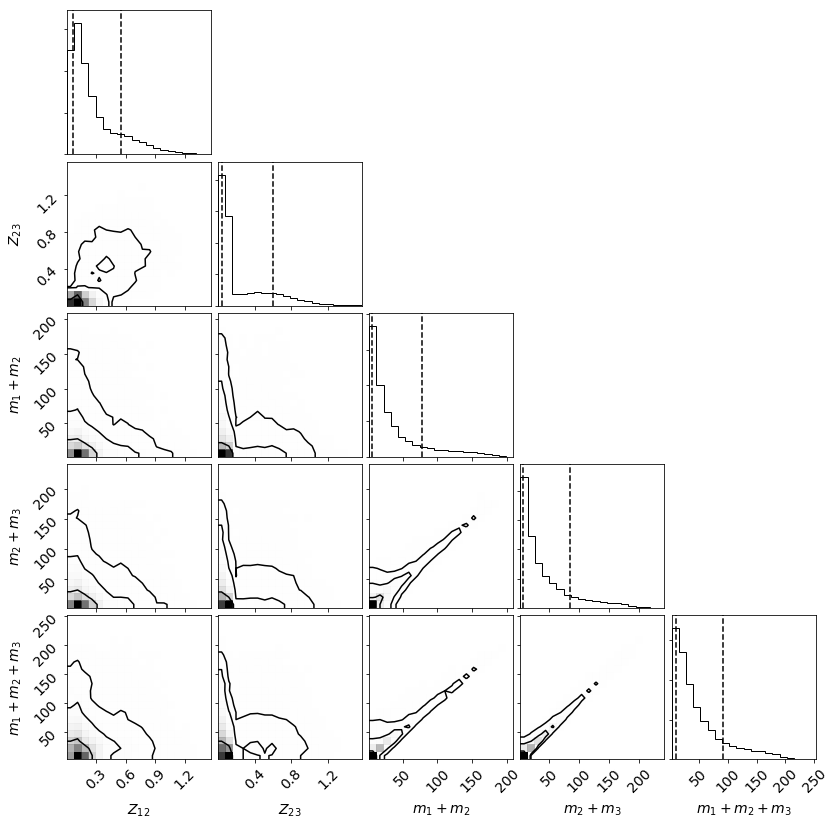

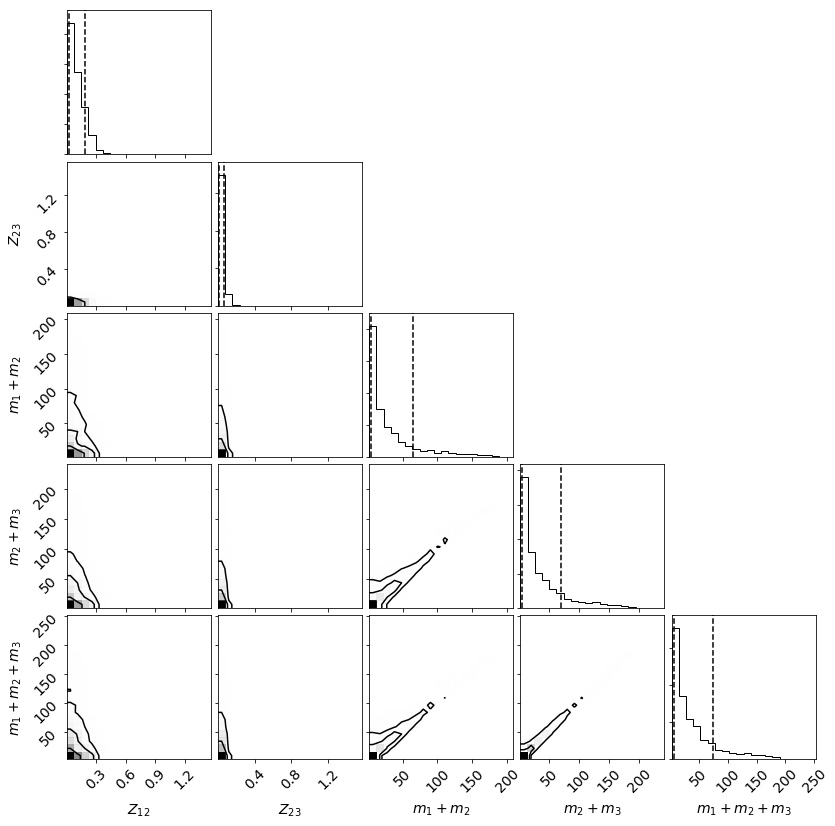

In [47]:
labels = ["Z12", "Z23", "m1+m2", "m2+m3", "total m"]
labels2 = [r"$Z_{12}$", r"$Z_{23}$", r"$m_1 + m_2$", r"$m_2 + m_3$", r"$m_1 + m_2 + m_3$"]
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False)
plt.savefig("figs/" + plot_str + "_param_corner_noweight.png", bbox_inches="tight")
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False, weights=df["probstability"])
plt.savefig("figs/" + plot_str + "_param_corner_weight.png", bbox_inches="tight")



std before: 7.112094
std after: 3.981779
factor of 1.786160 smaller
"sigma" before: 5.686362
"sigma" after: nan
factor of nan smaller


std before: 40.125046
std after: 36.477259
factor of 1.100002 smaller
"sigma" before: 31.961511
"sigma" after: nan
factor of nan smaller


std before: 13.986796
std after: 10.671662
factor of 1.310648 smaller
"sigma" before: 9.799366
"sigma" after: nan
factor of nan smaller


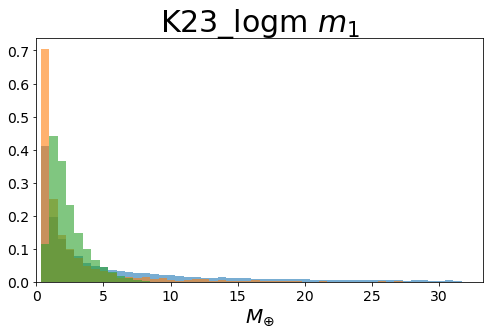

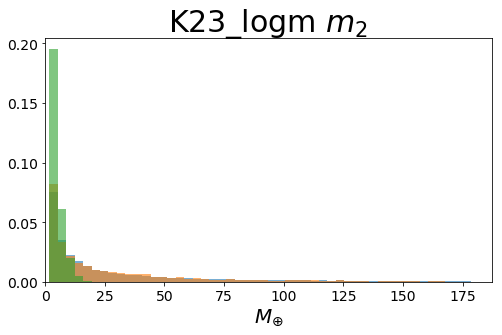

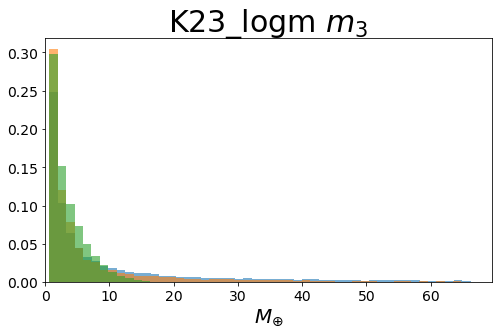

In [48]:
x, bins = sf.create_stab_hist(plot_str, df, "m1", label2=r"$m_1$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,0] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m1_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "m2", label2=r"$m_2$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,5] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m2_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "m3", label2=r"$m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,10] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m3_hist.png", bbox_inches="tight")



std before: 41.150980
std after: 37.092362
factor of 1.109419 smaller
"sigma" before: 33.972209
"sigma" after: nan
factor of nan smaller


std before: 43.070317
std after: 38.962097
factor of 1.105441 smaller
"sigma" before: 36.929157
"sigma" after: nan
factor of nan smaller


std before: 44.085830
std after: 39.648197
factor of 1.111925 smaller
"sigma" before: 38.450109
"sigma" after: nan
factor of nan smaller


(array([3.24354745e-02, 3.20453502e-02, 1.96222088e-02, 1.65418440e-02,
        1.19813454e-02, 9.92916226e-03, 8.15903348e-03, 9.28325301e-03,
        7.90935089e-03, 8.09710668e-03, 5.04620122e-03, 4.72886526e-03,
        4.00448103e-03, 4.83303950e-03, 3.01875526e-03, 2.83447490e-03,
        1.89303169e-03, 2.18744763e-03, 2.20060934e-03, 2.10565018e-03,
        1.67930145e-03, 1.18791127e-03, 1.89661425e-03, 1.10115932e-03,
        9.04170261e-04, 1.61066609e-03, 1.92608970e-03, 9.55387309e-04,
        1.03924736e-03, 1.05400767e-03, 8.74654481e-04, 1.05124617e-03,
        8.96761779e-04, 6.03587919e-04, 5.66394315e-04, 7.32322794e-04,
        3.90464218e-04, 4.04417678e-04, 4.73509199e-04, 1.71645947e-04,
        5.30164972e-05, 2.96334075e-05, 8.72476857e-05, 1.08448989e-04,
        2.13970479e-07, 2.63568634e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.86022606e-05]),
 array([  2.92692338,   7.71711849,  12.50731359,  17.2975087 ,
         22.08770381,  26.8778

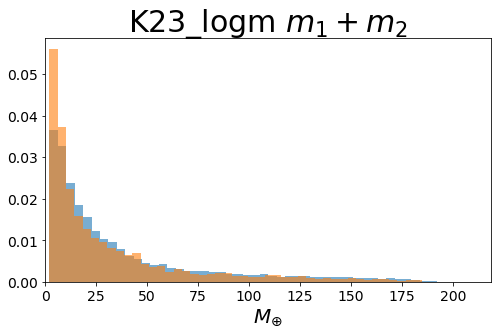

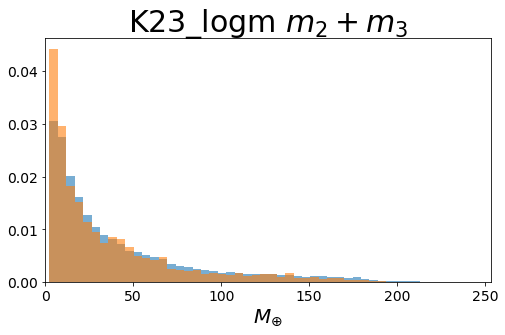

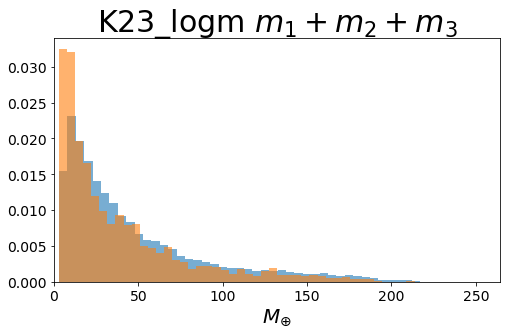

In [49]:
sf.create_stab_hist(plot_str, df, "m1+m2", label2=r"$m_1 + m_2$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
sf.create_stab_hist(plot_str, df, "m2+m3", label2=r"$m_2 + m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
sf.create_stab_hist(plot_str, df, "total m", label2=r"$m_1 + m_2 + m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)



std before: 0.232227
std after: 0.122679
factor of 1.892964 smaller
"sigma" before: 0.241338
"sigma" after: nan
factor of nan smaller


std before: 0.241959
std after: 0.067803
factor of 3.568581 smaller
"sigma" before: 0.242547
"sigma" after: nan
factor of nan smaller


std before: 0.244484
std after: 0.059919
factor of 4.080228 smaller
"sigma" before: 0.244625
"sigma" after: nan
factor of nan smaller


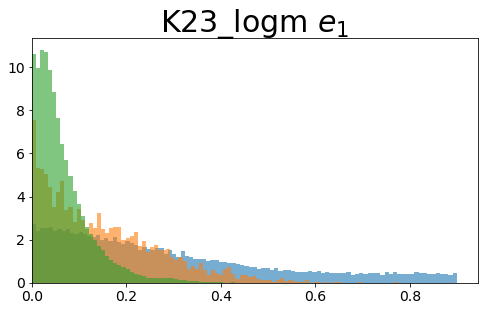

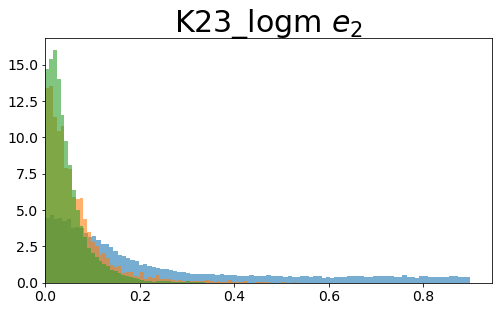

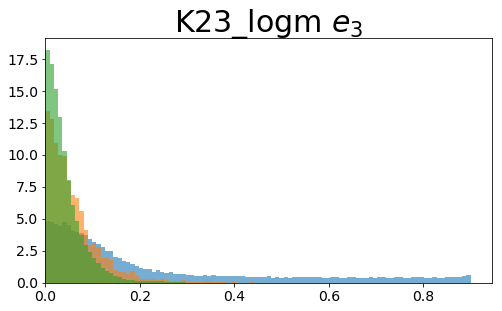

In [50]:
nbins=100
x, bins = sf.create_stab_hist(plot_str, df, "e1", show_quantiles=False, label2=r"$e_1$", nbins=nbins)
plt.hist(np.sqrt(post[:,2]**2 + post[:,3]**2), density=True, alpha=0.6, bins=bins)
# plt.xlim(0,0.2)
plt.savefig("figs/" + plot_str + "_e1_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "e2", show_quantiles=False, label2=r"$e_2$", nbins=nbins)
plt.hist(np.sqrt(post[:,7]**2 + post[:,8]**2), density=True, alpha=0.6, bins=bins)
# plt.xlim(0,0.2)
plt.savefig("figs/" + plot_str + "_e2_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "e3", show_quantiles=False, label2=r"$e_3$", nbins=nbins)
plt.hist(np.sqrt(post[:,12]**2 + post[:,13]**2), density=True, alpha=0.6, bins=bins)
# plt.xlim(0,0.2)
plt.savefig("figs/" + plot_str + "_e3_hist.png", bbox_inches="tight")



std before: 0.255498
std after: 0.076732
factor of 3.329757 smaller
"sigma" before: 0.233466
"sigma" after: nan
factor of nan smaller


std before: 0.289294
std after: 0.031051
factor of 9.316710 smaller
"sigma" before: 0.265913
"sigma" after: nan
factor of nan smaller


(array([1.31875157e+01, 1.58597051e+01, 7.57626084e+00, 2.84517592e+00,
        1.07716182e+00, 2.69922570e-01, 5.31131669e-02, 1.57496480e-02,
        5.81575957e-03, 5.07132888e-04, 1.76322995e-04, 1.31021808e-03,
        3.63357172e-04, 1.32215445e-03, 8.19739693e-04, 1.57358870e-02,
        1.46053539e-04, 9.67810632e-05, 5.89626460e-05, 4.72596507e-03,
        6.47269049e-04, 1.07200633e-04, 3.01099771e-04, 2.99602772e-04,
        1.43021725e-04, 1.93282136e-04, 1.62301858e-04, 4.18615124e-05,
        2.05422985e-05, 8.19945785e-05, 2.33156700e-04, 1.04632021e-04,
        2.87419886e-03, 2.61927304e-04, 1.10541761e-03, 5.50659496e-03,
        2.22170423e-04, 2.15899393e-04, 2.62226146e-04, 1.95894239e-04,
        5.44342739e-05, 1.68011794e-04, 1.23757030e-04, 4.26514657e-04,
        4.87236864e-05, 3.37551289e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.73009454e-05]),
 array([3.50552203e-04, 2.47827624e-02, 4.92149725e-02, 7.36471827e-02,
        9.80793928e-02

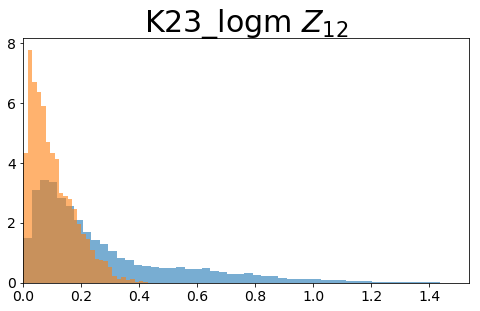

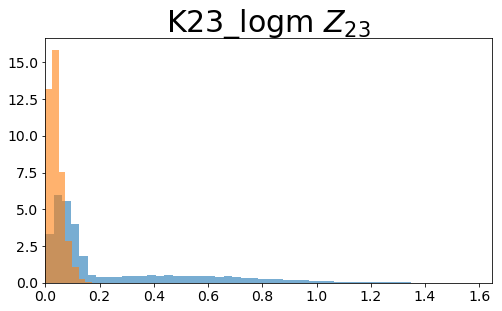

In [51]:
sf.create_stab_hist(plot_str, df, "Z12", show_quantiles=False, label2=r"$Z_{12}$")
sf.create_stab_hist(plot_str, df, "Z23", show_quantiles=False, label2=r"$Z_{23}$")

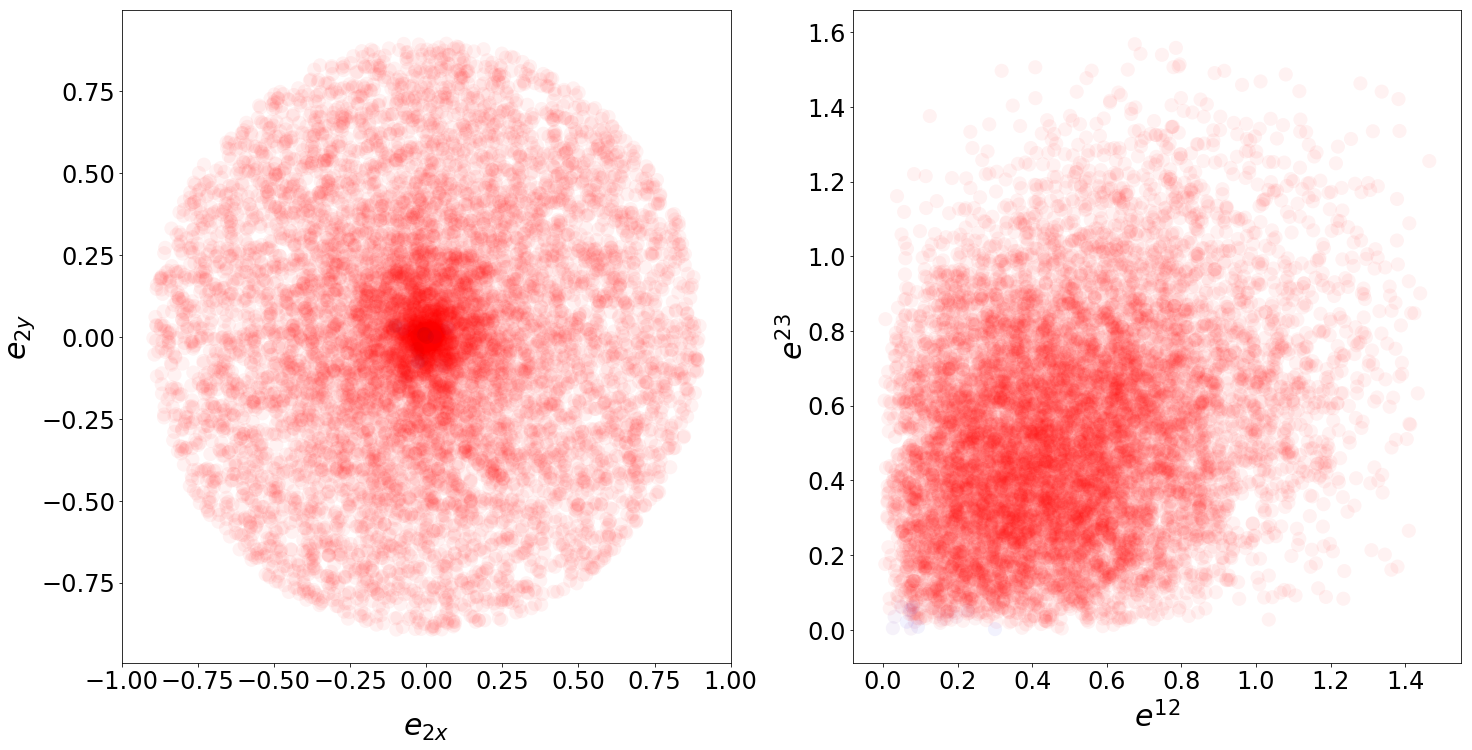

In [155]:
create_color_plots(df.loc[:10000])

# n-body

In [7]:
files = glob.glob(sim_names + "_sa_*.bin")
sim_ids = np.sort(np.array([int(file[16:-4]) for file in files]))

In [8]:
stable_1e9 = np.zeros(len(files))
for i in range(len(files)):
    file = files[i]
    sa = rebound.SimulationArchive(file)
    P1 = sa[0].particles[1].P
    orbits = sa[-1].t / P1
    stable_1e9[i] = orbits > 9e8

In [9]:
df1 = sf.add_k_cols(pd.DataFrame(sim_ids, columns=['sim']))
df1['probstability'] = stable_1e9

def get_k(row):
    return sf.get_k(sim_names + "_sa", row)

dasklabels = dd.from_pandas(df1, npartitions=n_workers)
df = dasklabels.apply(get_k, axis=1, meta=df1).compute(scheduler='processes')

df["m1"] *= sf.earth_mass_p_solar_mass
df["m2"] *= sf.earth_mass_p_solar_mass
df["m3"] *= sf.earth_mass_p_solar_mass
df["m1+m2"] = df["m1"] + df["m2"]
df["m2+m3"] = df["m2"] + df["m3"]
df["total m"] = df["m1"] + df["m2"] + df["m3"]

df.to_csv(sim_names + "_nbody.csv")

In [58]:
len(files)

7109

# Plotting n-body results

In [8]:
df = pd.read_csv(sim_names + "_nbody.csv", index_col=0)
# df = df[df["probstability"] != 0]
scores = 2 * df["probstability"]
n = len(scores)
# effective sample size using eq 9.13 https://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf
effective_sample_size = n * np.mean(scores) ** 2 / np.mean(scores ** 2)
print(effective_sample_size)
print(n)
print(effective_sample_size / n)

plot_str = system + "_" + name_add + "_nb"

1189.0
7109
0.16725277816851877


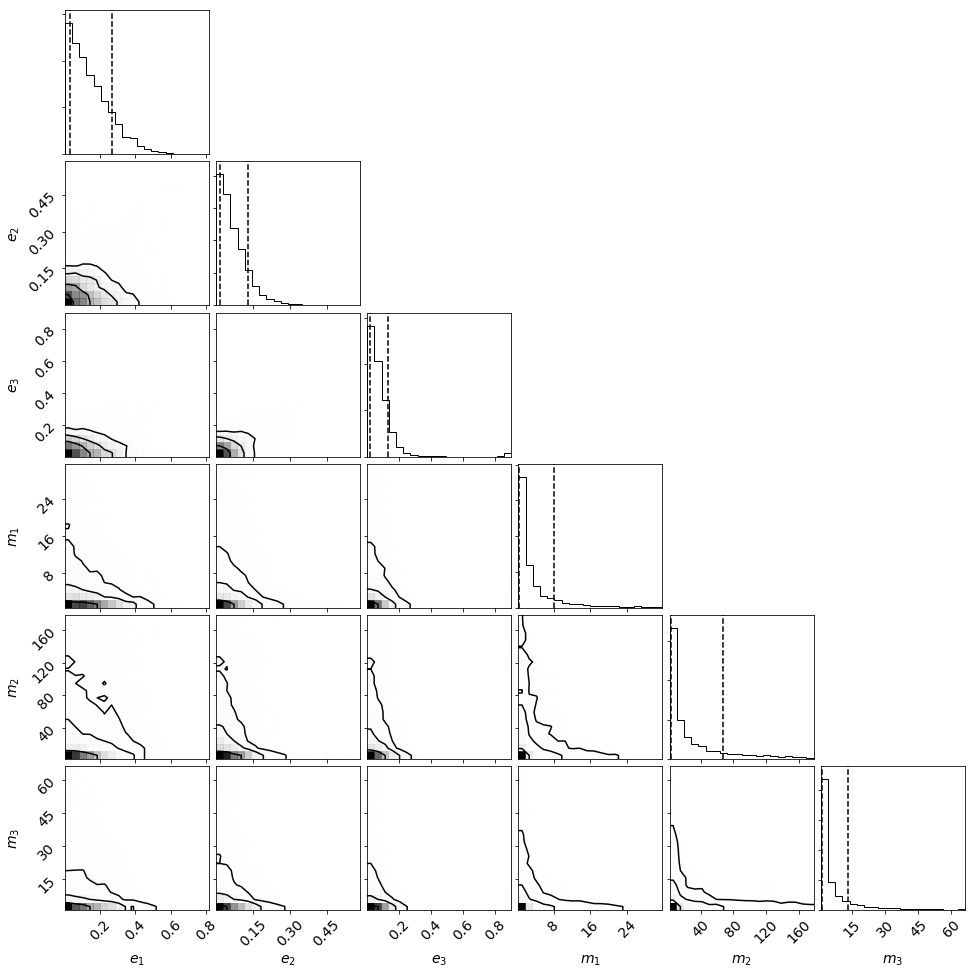

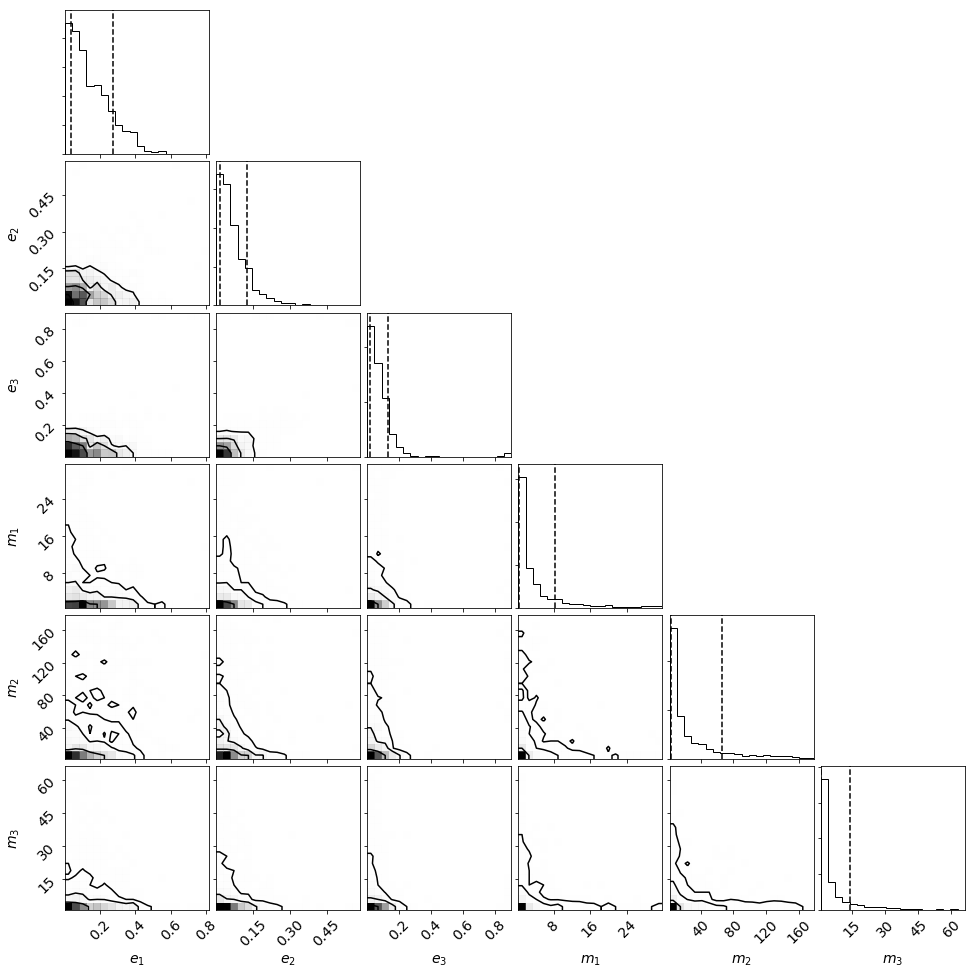

In [60]:
labels = ["e1","e2", "e3", "m1", "m2", "m3"]
labels2 = [r"$e_1$", r"$e_2$", r"$e_3$", r"$m_1$", r"$m_2$", r"$m_3$"]
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False)
plt.savefig("figs/" + plot_str + "_physical_corner_1e5.png", bbox_inches="tight")
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False, weights=df["probstability"])
plt.savefig("figs/" + plot_str + "_physical_corner_1e9.png", bbox_inches="tight")

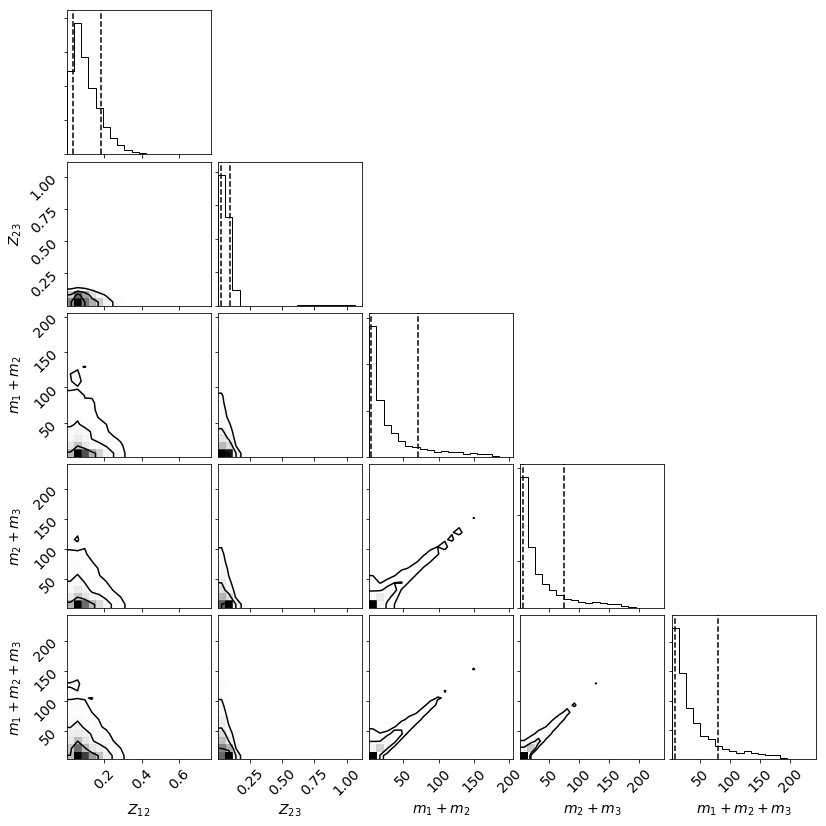

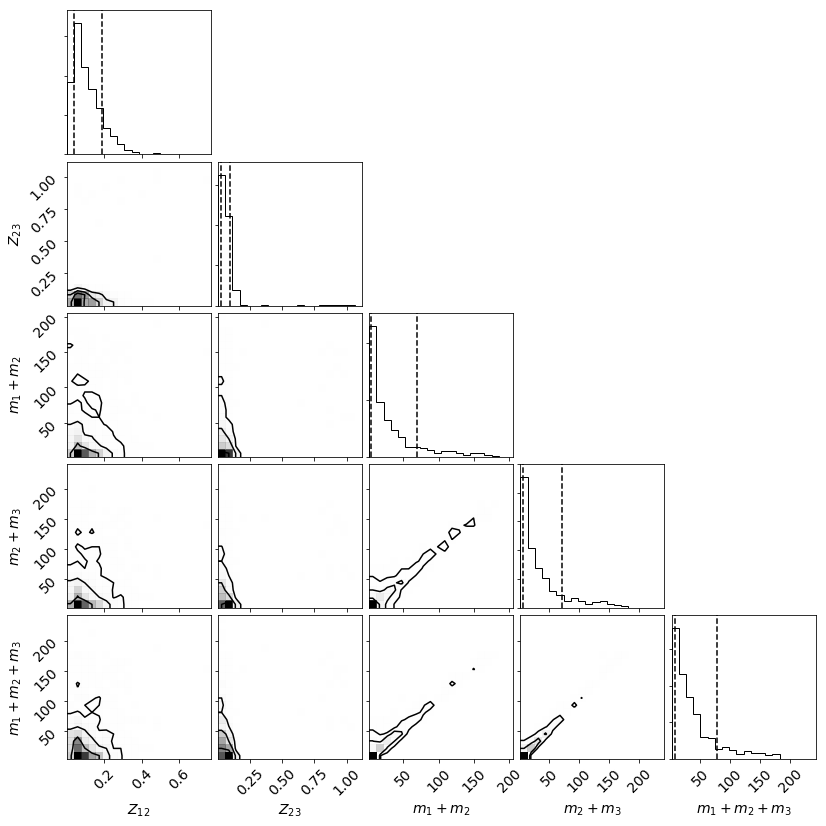

In [61]:
labels = ["Z12", "Z23", "m1+m2", "m2+m3", "total m"]
labels2 = [r"$Z_{12}$", r"$Z_{23}$", r"$m_1 + m_2$", r"$m_2 + m_3$", r"$m_1 + m_2 + m_3$"]
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False)
plt.savefig("figs/" + plot_str + "_param_corner_1e5.png", bbox_inches="tight")
fig = corner.corner(df[labels], labels=labels2, quantiles=[0.15,0.85], plot_datapoints=False, weights=df["probstability"])
plt.savefig("figs/" + plot_str + "_param_corner_1e9.png", bbox_inches="tight")



std before: 5.721812
std after: 6.073939
factor of 0.942027 smaller
"sigma" before: 3.553945
"sigma" after: nan
factor of nan smaller


std before: 38.765079
std after: 38.191319
factor of 1.015023 smaller
"sigma" before: 29.739732
"sigma" after: nan
factor of nan smaller


std before: 10.858335
std after: 10.520284
factor of 1.032133 smaller
"sigma" before: 5.638360
"sigma" after: nan
factor of nan smaller


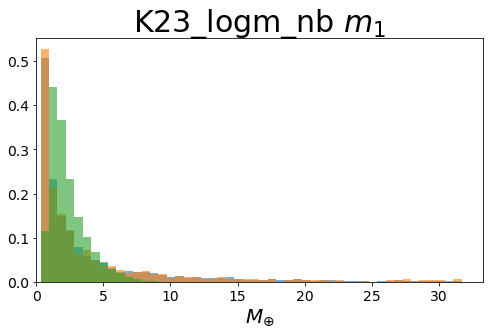

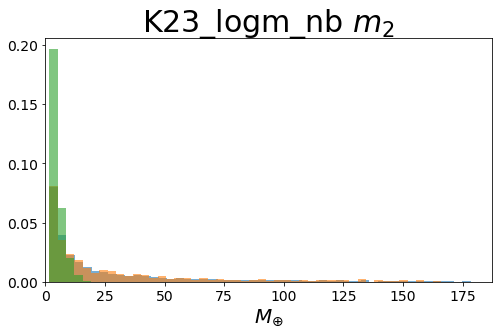

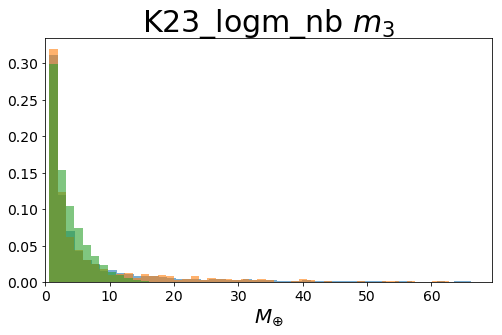

In [62]:
x, bins = sf.create_stab_hist(plot_str, df, "m1", label2=r"$m_1$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,0] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m1_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "m2", label2=r"$m_2$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,5] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m2_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "m3", label2=r"$m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
plt.hist(post[:,10] * 1.100 * 333000, density=True, alpha=0.6, bins=bins)
plt.savefig("figs/" + plot_str + "_m3_hist.png", bbox_inches="tight")



std before: 39.408210
std after: 38.947989
factor of 1.011816 smaller
"sigma" before: 30.885535
"sigma" after: nan
factor of nan smaller


std before: 40.507050
std after: 39.740499
factor of 1.019289 smaller
"sigma" before: 32.359474
"sigma" after: nan
factor of nan smaller


std before: 41.104624
std after: 40.350632
factor of 1.018686 smaller
"sigma" before: 33.255864
"sigma" after: nan
factor of nan smaller


(array([0.02248989, 0.02916658, 0.02248989, 0.01669172, 0.01282627,
        0.01229916, 0.01265056, 0.01001503, 0.00948792, 0.00720379,
        0.00474396, 0.00386545, 0.00386545, 0.00351405, 0.00474396,
        0.00193273, 0.00228413, 0.00228413, 0.00316264, 0.00122992,
        0.00140562, 0.00210843, 0.00175702, 0.00087851, 0.00087851,
        0.00175702, 0.00193273, 0.00122992, 0.00052711, 0.00158132,
        0.00122992, 0.00140562, 0.00087851, 0.00087851, 0.00052711,
        0.00158132, 0.0003514 , 0.0003514 , 0.0001757 , 0.        ,
        0.0001757 , 0.        , 0.0001757 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0001757 ]),
 array([  3.09917723,   7.88592726,  12.67267729,  17.45942732,
         22.24617735,  27.03292738,  31.81967741,  36.60642744,
         41.39317747,  46.1799275 ,  50.96667753,  55.75342756,
         60.54017759,  65.32692762,  70.11367765,  74.90042768,
         79.68717771,  84.47392774,  89.26067777,  94.0474278 

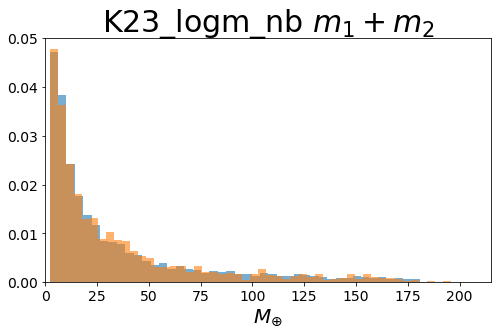

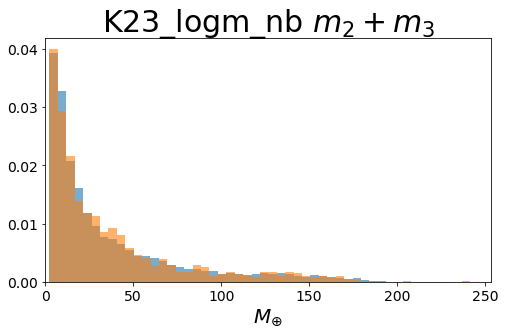

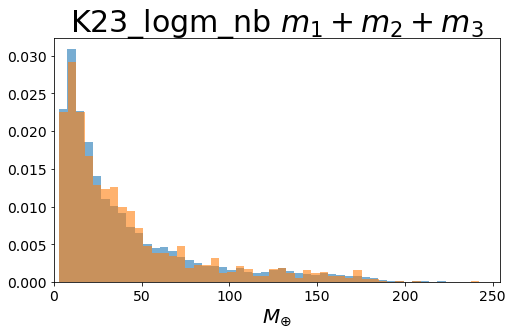

In [63]:
sf.create_stab_hist(plot_str, df, "m1+m2", label2=r"$m_1 + m_2$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
sf.create_stab_hist(plot_str, df, "m2+m3", label2=r"$m_2 + m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)
sf.create_stab_hist(plot_str, df, "total m", label2=r"$m_1 + m_2 + m_3$", xlabel=r"$M_{\oplus}$", show_quantiles=False)



std before: 0.115633
std after: 0.120318
factor of 0.961055 smaller
"sigma" before: 0.114998
"sigma" after: nan
factor of nan smaller


std before: 0.066976
std after: 0.065280
factor of 1.025988 smaller
"sigma" before: 0.054770
"sigma" after: nan
factor of nan smaller


std before: 0.101549
std after: 0.104286
factor of 0.973750 smaller
"sigma" before: 0.055046
"sigma" after: nan
factor of nan smaller


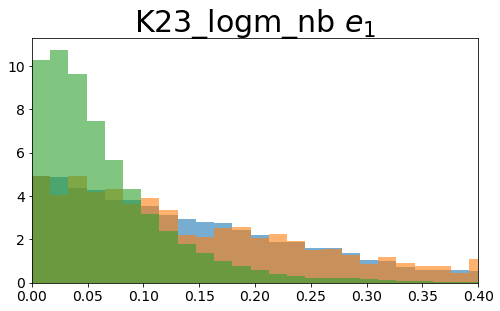

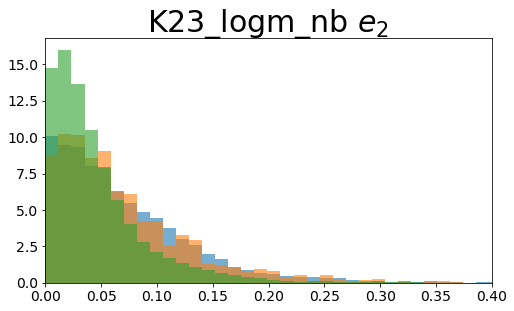

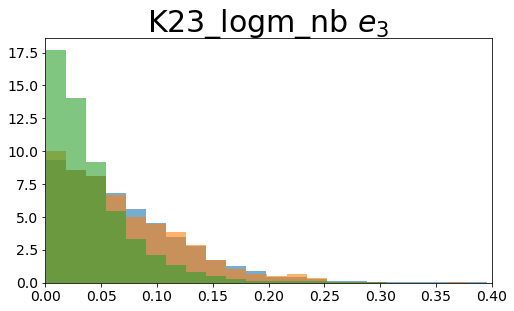

In [64]:
nbins=50
x, bins = sf.create_stab_hist(plot_str, df, "e1", show_quantiles=False, label2=r"$e_1$", nbins=nbins)
plt.hist(np.sqrt(post[:,2]**2 + post[:,3]**2), density=True, alpha=0.6, bins=bins)
plt.xlim(0,0.4)
plt.savefig("figs/" + plot_str + "_e1_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "e2", show_quantiles=False, label2=r"$e_2$", nbins=nbins)
plt.hist(np.sqrt(post[:,7]**2 + post[:,8]**2), density=True, alpha=0.6, bins=bins)
plt.xlim(0,0.4)
plt.savefig("figs/" + plot_str + "_e2_hist.png", bbox_inches="tight")

x, bins = sf.create_stab_hist(plot_str, df, "e3", show_quantiles=False, label2=r"$e_3$", nbins=nbins)
plt.hist(np.sqrt(post[:,12]**2 + post[:,13]**2), density=True, alpha=0.6, bins=bins)
plt.xlim(0,0.4)
plt.savefig("figs/" + plot_str + "_e3_hist.png", bbox_inches="tight")



std before: 0.074572
std after: 0.078645
factor of 0.948210 smaller
"sigma" before: 0.069605
"sigma" after: nan
factor of nan smaller


std before: 0.088065
std after: 0.093772
factor of 0.939141 smaller
"sigma" before: 0.035090
"sigma" after: nan
factor of nan smaller


(array([ 6.40026083, 11.84463856, 11.67839802,  8.14578652,  5.40281759,
         3.40793109,  1.49616487,  0.41560135,  0.04156014,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04156014,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.04156014,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.12468041,  0.04156014,  0.04156014,  0.04156014,
         0.04156014,  0.04156014,  0.04156014,  0.04156014,  0.08312027]),
 array([0.00111774, 0.02135451, 0.04159128, 0.06182805, 0.08206482,
        0.10230159, 0.12253836, 0.14277513, 0.1630119 , 0.18324867,
        0.20348544, 0.22372221, 0.24395898, 0.26419575, 0.28443252,
        0.30466929, 0.32490606, 0.34514283, 0.3653796 , 0.385616

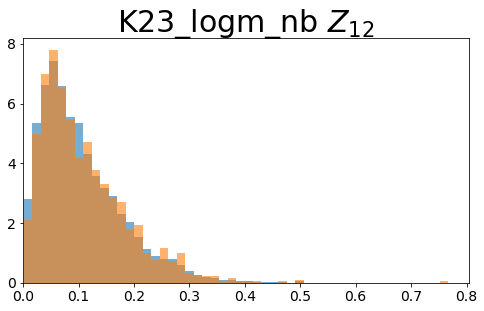

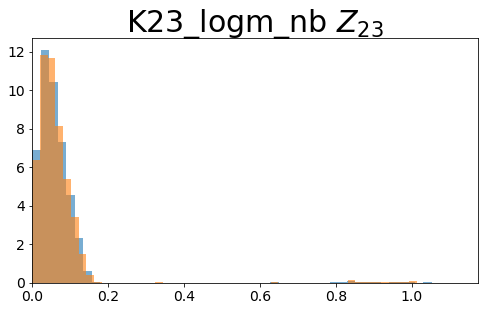

In [65]:
sf.create_stab_hist(plot_str, df, "Z12", show_quantiles=False, label2=r"$Z_{12}$")
sf.create_stab_hist(plot_str, df, "Z23", show_quantiles=False, label2=r"$Z_{23}$")

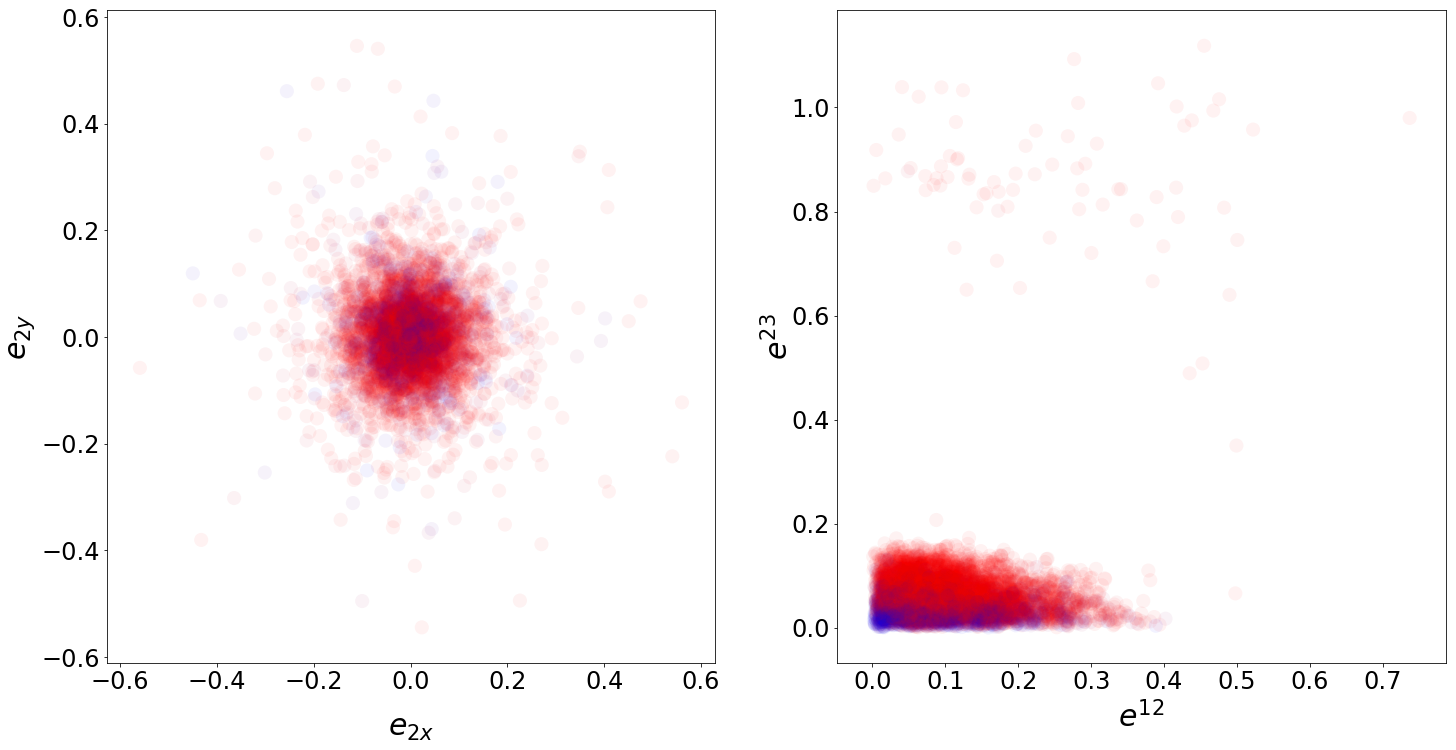

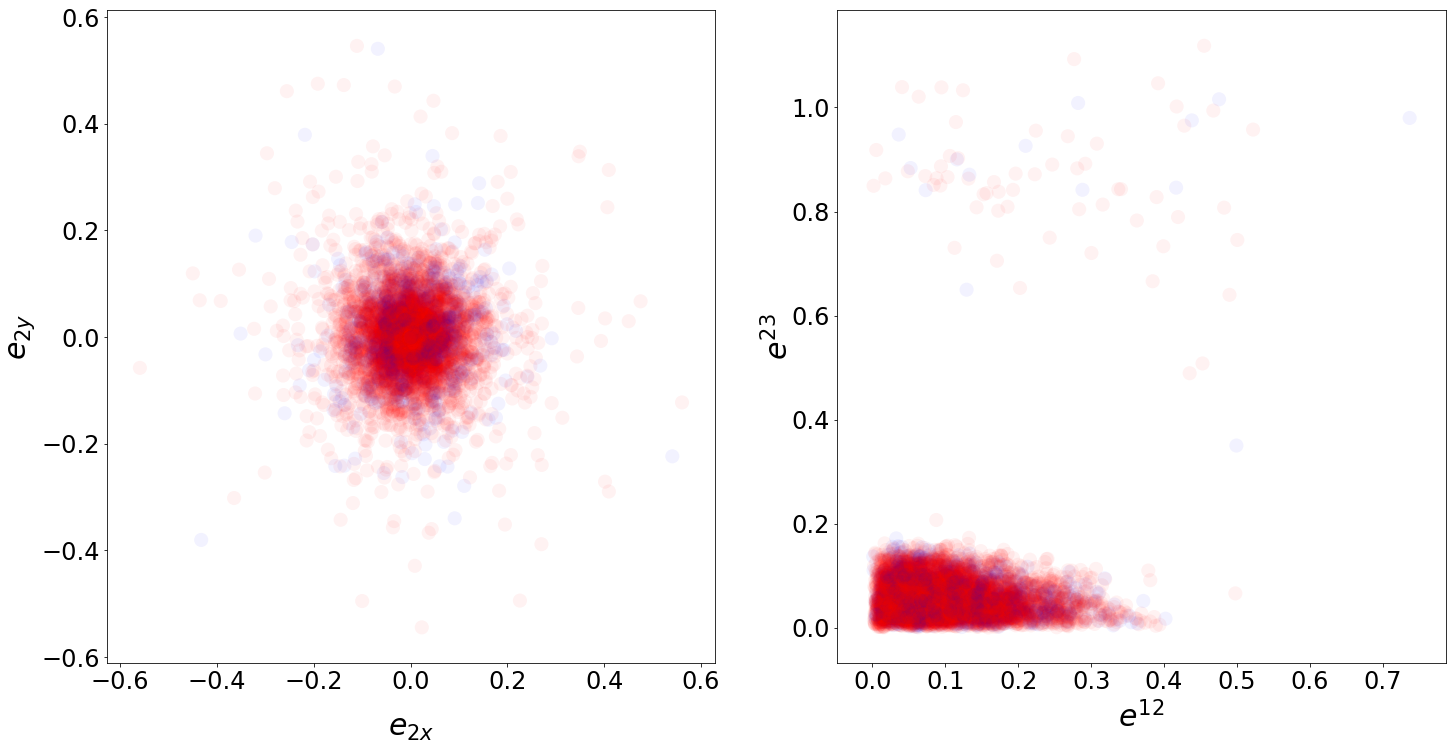

In [11]:
df = pd.read_csv(sim_names + "_SPOCK.csv", index_col=0)
df2 = pd.read_csv(sim_names + "_nbody.csv", index_col=0)

# df["probstability"] = df["probstability"] > 0.605
create_color_plots(df.set_index("sim").loc[df2.sim.astype(int)])
create_color_plots(df2)

Text(0.5, 1.0, 'Z12')

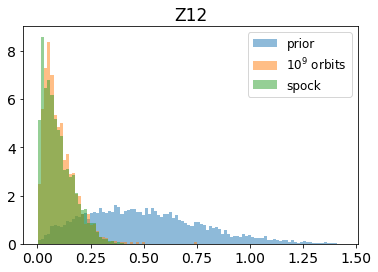

In [12]:
x, bins, x = plt.hist(df.loc[:10000].Z12, alpha=0.5, density=True, label="prior", bins=100)
plt.hist(df2.loc[df2.probstability > 0].Z12, alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
# plt.hist(df2.Z12, alpha=0.5, density=True, label=r"$10^5$ orbits", bins=bins)
# plt.hist(df.loc[df.probstability > 0].Z12, alpha=0.5, density=True, bins=bins, label=r"$10^4$ orbits")
plt.hist(df.Z12, alpha=0.5, density=True, bins=bins, label="spock", weights = df.probstability)
plt.legend()
plt.title("Z12")

Text(0.5, 1.0, 'Z23')

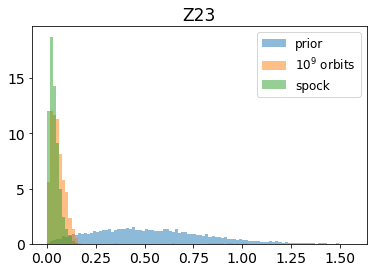

In [13]:
x, bins, x = plt.hist(df.loc[:10000].Z23, alpha=0.5, density=True, label="prior", bins=100)
plt.hist(df2.loc[df2.probstability > 0].Z23, alpha=0.5, density=True, label=r"$10^9$ orbits", bins=bins)
# plt.hist(df2.Z23, alpha=0.5, density=True, label=r"$10^5$ orbits", bins=bins)
# plt.hist(df.loc[df.probstability > 0].Z23, alpha=0.5, density=True, bins=bins, label=r"$10^4$ orbits")
plt.hist(df.Z23, alpha=0.5, density=True, bins=bins, label="spock", weights = df.probstability)
plt.legend()
plt.title("Z23")

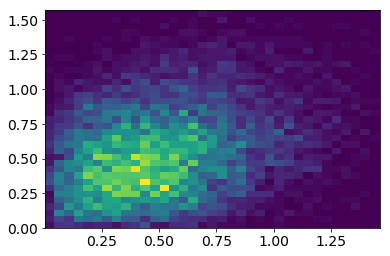

In [8]:
new_df = df.loc[:10000]
xx, x, y, xx = plt.hist2d(new_df.Z12, new_df.Z23, bins=35);

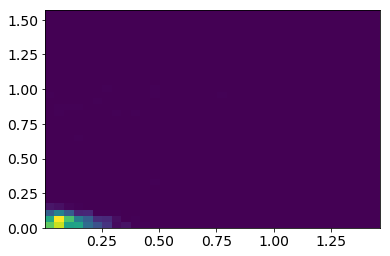

In [9]:
new_df = df2.loc[df2.probstability > 0.1]
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y]);

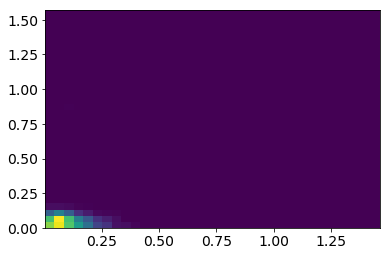

In [10]:
new_df = df2
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y]);

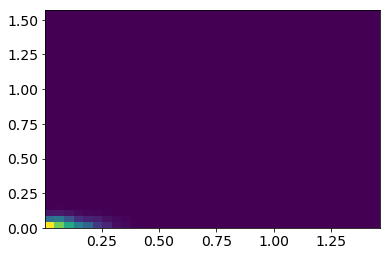

In [11]:
new_df = df
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y], weights=new_df.probstability);

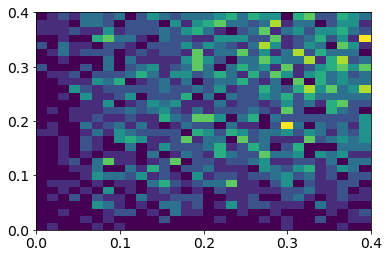

In [241]:
new_df = df.loc[:10000]
xx, x, y, xx = plt.hist2d(new_df.Z12, new_df.Z23, range=[[0, 0.4], [0, 0.4]], bins=30);

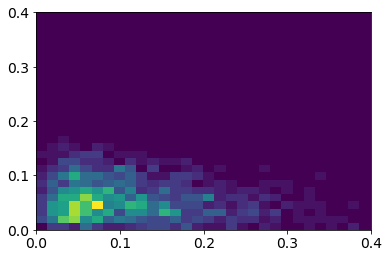

In [242]:
new_df = df2.loc[df2.probstability > 0.1]
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y]);

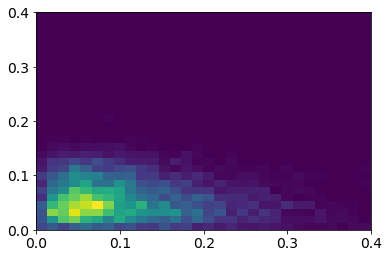

In [243]:
new_df = df2
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y]);

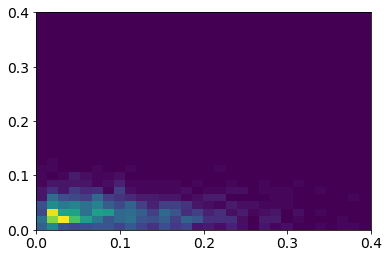

In [244]:
new_df = df.loc[df.probstability > 0.605]
plt.hist2d(new_df.Z12, new_df.Z23, bins=[x,y]);

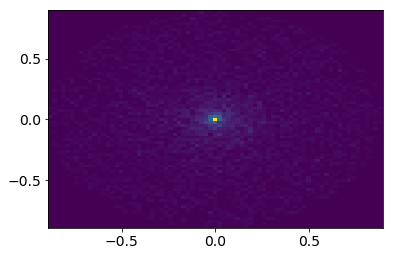

In [212]:
xx, x, y, xx = plt.hist2d(df.loc[:10000].h, df.loc[:10000].k, bins=75);

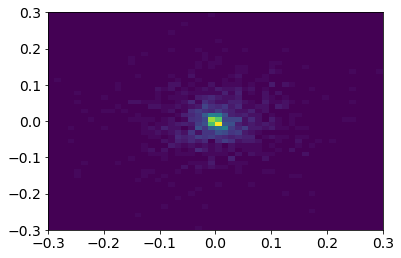

In [215]:
xx, x, y, xx = plt.hist2d(df2.loc[df2.probstability > 0.1].h, df2.loc[df2.probstability > 0.1].k, range=[[-0.3, 0.3], [-0.3, 0.3]], bins=50);

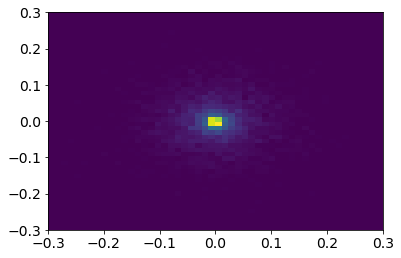

In [216]:
plt.hist2d(df2.h, df2.k, bins=[x,y]);

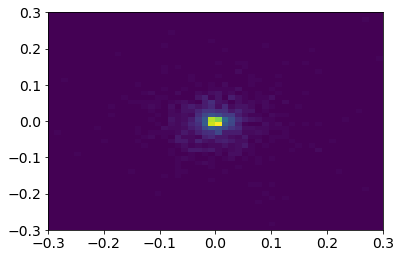

In [217]:
plt.hist2d(df.loc[df.probstability > 0.605].h, df.loc[df.probstability > 0.605].k, bins=[x,y]);

Text(0.5, 1.0, 'Z12')

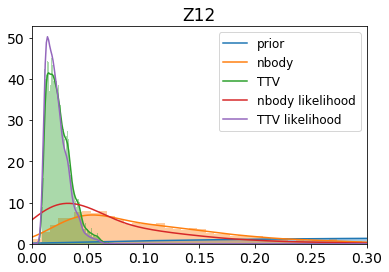

In [86]:
import scipy
from scipy.integrate import quad

df1 = pd.read_csv(sim_names + "_SPOCK.csv", index_col=0)
df2 = pd.read_csv(sim_names + "_nbody.csv", index_col=0)
df3 = pd.read_csv("Kepler-23_default_priors.csv", index_col=0)

df1 = df1.loc[:10000]
df2 = df2.loc[df2.probstability > 0]
df3 = df3.loc[10000:20000]

thing1 = scipy.stats.gaussian_kde(df1.Z12)
thing2 = scipy.stats.gaussian_kde(df2.Z12)
thing3 = scipy.stats.gaussian_kde(df3.Z12)

xs = np.linspace(0,1,1000)
plt.hist(df1.Z12, density=True, color="C0", bins=100, alpha=0.4)
plt.hist(df2.Z12, density=True, color="C1", bins=100, alpha=0.4)
plt.hist(df3.Z12, density=True, color="C2", bins=100, alpha=0.4)
# plt.plot(xs, thing1(xs) + thing1(-xs), label="prior", color="C0")
plt.plot(xs, thing1(xs), label="prior", color="C0")
# plt.plot(xs, thing2(xs) + thing2(-xs), label="nbody", color="C1")
plt.plot(xs, thing2(xs), label="nbody", color="C1")
# plt.plot(xs, thing3(xs) + thing3(-xs), label="TTV", color="C2")
plt.plot(xs, thing3(xs), label="TTV", color="C2")

def func(x):
    return thing2(x) / thing1(x)

normaliz = quad(func, 0, 1.5)
plt.plot(xs, func(xs) / normaliz[0], label="nbody likelihood", color="C3")

def func(x):
    return thing3(x) / thing1(x)

normaliz = quad(func, 0, 1.5)
plt.plot(xs, func(xs) / normaliz[0], label="TTV likelihood", color="C4")

plt.xlim(0,0.3)

plt.legend()
plt.title("Z12")

Text(0.5, 1.0, 'Z23')

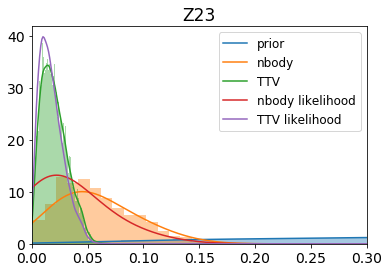

In [87]:
thing1 = scipy.stats.gaussian_kde(df1.Z23)
thing2 = scipy.stats.gaussian_kde(df2.Z23)
thing3 = scipy.stats.gaussian_kde(df3.Z23)

plt.hist(df1.Z23, density=True, color="C0", bins=100, alpha=0.4)
plt.hist(df2.Z23, density=True, color="C1", bins=100, alpha=0.4)
plt.hist(df3.Z23, density=True, color="C2", bins=100, alpha=0.4)
# plt.plot(xs, thing1(xs) + thing1(-xs), label="prior", color="C0")
plt.plot(xs, thing1(xs), label="prior", color="C0")
# plt.plot(xs, thing2(xs) + thing2(-xs), label="nbody", color="C1")
plt.plot(xs, thing2(xs), label="nbody", color="C1")
# plt.plot(xs, thing3(xs) + thing3(-xs), label="TTV", color="C2")
plt.plot(xs, thing3(xs), label="TTV", color="C2")

def func(x):
    return thing2(x) / thing1(x)

normaliz = quad(func, 0, 1.5)
plt.plot(xs, func(xs) / normaliz[0], label="nbody likelihood", color="C3")

def func(x):
    return thing3(x) / thing1(x)

normaliz = quad(func, 0, 1.5)
plt.plot(xs, func(xs) / normaliz[0], label="TTV likelihood", color="C4")

plt.xlim(0,0.3)

plt.legend()
plt.title("Z23")

Text(0.5, 1.0, 'e1')

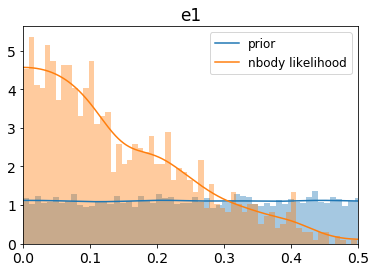

In [89]:
thing1 = scipy.stats.gaussian_kde(df1.e1)
thing2 = scipy.stats.gaussian_kde(df2.e1)

plt.hist(df1.e1, density=True, color="C0", bins=100, alpha=0.4)
plt.hist(df2.e1, density=True, color="C1", bins=100, alpha=0.4)
plt.plot(xs, thing1(xs) + thing1(-xs), label="prior", color="C0")
# plt.plot(xs, thing1(xs), label="prior", color="C0")
plt.plot(xs, thing2(xs) + thing2(-xs), label="nbody likelihood", color="C1")
# plt.plot(xs, thing2(xs), label="nbody", color="C1")
plt.xlim(0,0.5)

plt.legend()
plt.title("e1")

Text(0.5, 1.0, 'e2')

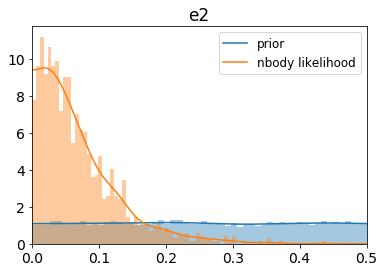

In [90]:
thing1 = scipy.stats.gaussian_kde(df1.e2)
thing2 = scipy.stats.gaussian_kde(df2.e2)

plt.hist(df1.e2, density=True, color="C0", bins=100, alpha=0.4)
plt.hist(df2.e2, density=True, color="C1", bins=100, alpha=0.4)
plt.plot(xs, thing1(xs) + thing1(-xs), label="prior", color="C0")
# plt.plot(xs, thing1(xs), label="prior", color="C0")
plt.plot(xs, thing2(xs) + thing2(-xs), label="nbody likelihood", color="C1")
# plt.plot(xs, thing2(xs), label="nbody", color="C1")
plt.xlim(0,0.5)
plt.legend()
plt.title("e2")

In [ ]:
thing1 = scipy.stats.gaussian_kde(df1.e3)
thing2 = scipy.stats.gaussian_kde(df2.e3)

plt.hist(df1.e3, density=True, color="C0", bins=100, alpha=0.4)
plt.hist(df2.e3, density=True, color="C1", bins=100, alpha=0.4)
plt.plot(xs, thing1(xs) + thing1(-xs), label="prior", color="C0")
# plt.plot(xs, thing1(xs), label="prior", color="C0")
plt.plot(xs, thing2(xs) + thing2(-xs), label="nbody likelihood", color="C1")
# plt.plot(xs, thing2(xs), label="nbody", color="C1")
plt.xlim(0,0.5)
plt.legend()
plt.title("e3")

Text(0.5, 1.0, 'e3')

In [ ]:
df = pd.read_csv("Kepler-23_default_priors.csv", index_col=0)